In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/roadNet-CA.txt', 'r') as file:
    edges = [tuple(map(int, line.strip().split())) for line in file.readlines()]

Number of Nodes: 1965206
Number of Edges: 2766607
Density of the Network: 1.4327206657979522e-06


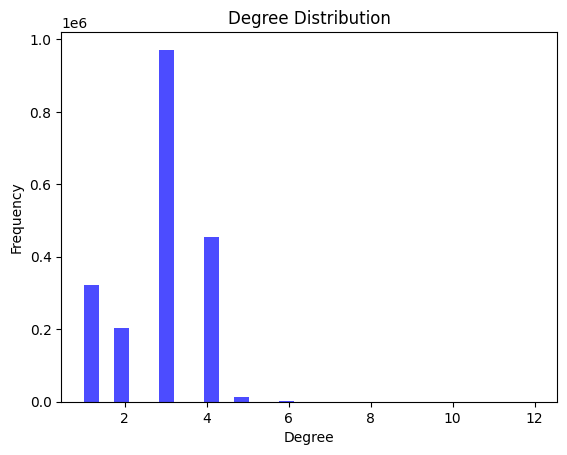

In [5]:
G = nx.Graph()
G.add_edges_from(edges)

print("Number of Nodes:", G.number_of_nodes())
print("Number of Edges:", G.number_of_edges())
print("Density of the Network:", nx.density(G))

degree_sequence = [d for n, d in G.degree()]
plt.hist(degree_sequence, bins=30, alpha=0.7, color='b')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution')
plt.show()

In [6]:
page_rank_val = nx.pagerank(G)
sorted_page_ranks = sorted(page_rank_val.items(), key = lambda x: x[1], reverse=True)

# Print important places based on pagerank algoritm
print("Top 10 places based on PageRank:")
print("Place : PageRank")
for place, centrality_val in sorted_page_ranks[:10]:
    print(str(place) + " : " + str(centrality_val))

Top 10 places based on PageRank:
Place : PageRank
225438 : 2.4552133465906375e-06
287362 : 2.383125908089704e-06
241926 : 2.166863592586901e-06
748883 : 2.0226887155850333e-06
1682326 : 2.0226887155850333e-06
241299 : 1.950601277084099e-06
264566 : 1.950601277084099e-06
403664 : 1.950601277084099e-06
673507 : 1.950601277084099e-06
1258079 : 1.950601277084099e-06


In [7]:
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key = lambda x: x[1], reverse=True)
print("Top 10 places based on Degree Centrality:")
print("Place : Degree Centrality")
for place, centrality_val in sorted_degree_centrality[:10]:
    print(str(place) + " : " + str(centrality_val) )

Top 10 places based on Degree Centrality:
Place : Degree Centrality
562818 : 6.106233191957073e-06
534751 : 5.088527659964228e-06
521168 : 5.088527659964228e-06
1795416 : 4.5796748939678044e-06
5657 : 4.070822127971382e-06
5727 : 4.070822127971382e-06
6356 : 4.070822127971382e-06
290162 : 4.070822127971382e-06
291797 : 4.070822127971382e-06
309321 : 4.070822127971382e-06


In [8]:
eigen_vector_centrality = nx.eigenvector_centrality(G)
sorted_eigen_vector_centrality = sorted(eigen_vector_centrality.items(), key = lambda x: x[1], reverse=True)

# Print important places based on eigenvector centrality
print("Top 10 places based on Eigen Vector Centrality:")
print("Place : Eigen Vecor Centrality")
for place, centrality_val in sorted_eigen_vector_centrality[:10]:
    print(str(place) + " : " + str(centrality_val))

Top 10 places based on Eigen Vector Centrality:
Place : Eigen Vecor Centrality
534751 : 0.4410050290282108
498390 : 0.24929503856228807
534774 : 0.24779993140694834
534750 : 0.24050039626979247
534779 : 0.22050712339285095
534753 : 0.21635529830375944
498389 : 0.1914507757522152
534777 : 0.18428337840273515
534775 : 0.16786244799282016
534752 : 0.164429429751562


In [9]:
src = sorted_eigen_vector_centrality[0][0]
shortest_paths = nx.single_source_dijkstra_path_length(G, src)
sorted_paths = sorted(shortest_paths.items(), key=lambda x: x[1])

# Print the nearest 100 nodes
print("Nearest 100 places from the most important place: ")
for target_node, path_length in sorted_paths[:100]:
    print("Shortest path from "+ str(src) + " to "+ str(target_node) + ":"+ str(path_length))

Nearest 100 places from the most important place: 
Shortest path from 534751 to 534751:0
Shortest path from 534751 to 534750:1
Shortest path from 534751 to 498390:1
Shortest path from 534751 to 498404:1
Shortest path from 534751 to 498389:1
Shortest path from 534751 to 534752:1
Shortest path from 534751 to 534753:1
Shortest path from 534751 to 534774:1
Shortest path from 534751 to 534775:1
Shortest path from 534751 to 534777:1
Shortest path from 534751 to 534779:1
Shortest path from 534751 to 498219:2
Shortest path from 534751 to 498388:2
Shortest path from 534751 to 534776:2
Shortest path from 534751 to 498220:2
Shortest path from 534751 to 534767:2
Shortest path from 534751 to 534768:2
Shortest path from 534751 to 498333:2
Shortest path from 534751 to 498405:2
Shortest path from 534751 to 534778:2
Shortest path from 534751 to 535446:2
Shortest path from 534751 to 498391:2
Shortest path from 534751 to 534765:2
Shortest path from 534751 to 534754:2
Shortest path from 534751 to 534769:2

In [18]:
selected_places = [place for place, _ in sorted_paths[:100]]
random_place = random.choice(selected_places)
print("Randomly chosen place among nearest 100 places is: "+str(random_place))
shortest_random_path = nx.shortest_path(G, source=src, target=random_place)
shortest_random_path_length = nx.shortest_path_length(G, source=src, target=random_place)
print("Shortest path before removing edge: "+str(shortest_random_path))
print("Shortest path length before removing edge: "+str(shortest_random_path_length))

Randomly chosen place among nearest 100 places is: 498334
Shortest path before removing edge: [534751, 498404, 498333, 498334]
Shortest path length before removing edge: 3


In [19]:
temp_Graph = G.copy()
if len(shortest_random_path) > 1:
    rand_idx = random.randint(1, len(shortest_random_path) - 1)
    edge_to_remove = (shortest_random_path[rand_idx-1],shortest_random_path[rand_idx])
    temp_Graph.remove_edge(*edge_to_remove)
    second_shortest_random_path = nx.shortest_path(temp_Graph, source=src, target=random_place)
    print("Shortest path after removing edge: "+str(second_shortest_random_path))
    second_shortest_random_path_length = nx.shortest_path_length(temp_Graph, source=src, target=random_place)
    print("Shortest path length after removing edge: "+str(second_shortest_random_path_length))

Shortest path after removing edge: [534751, 534750, 498388, 498305, 498334]
Shortest path length after removing edge: 4


In [ ]:
closeness_centrality_val = nx.closeness_centrality(G)
sorted_closeness_centrality = sorted(closeness_centrality_val.items(), key = lambda x: x[1], reverse=True)

# Places which are important as they are close than any other nodes
print("Top 10 places based on closeness Centrality  Approach:")
print("Place : Closeness Centrality")
for place, centrality_val in sorted_closeness_centrality[:10]:
    print(str(place) + " : " + str(centrality_val) )

In [ ]:
betweenness_centrality_vals = nx.betweenness_centrality(G)
sorted_betweenness_vals = sorted(betweenness_centrality_vals.items(), key = lambda x: x[1], reverse=True)

# Print important places based on betweenness centrality approach
print("Top 10 places based on Betweenness Centality:")
print("Place : Betweenness Centality")
for place, centrality_val in sorted_betweenness_vals[:10]:
    print(str(place) + " : " + str(centrality_val) )